In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
url = "https://raw.githubusercontent.com/manasacharyagit/Netflix-analysis/refs/heads/master/mymoviedb.csv"
df = pd.read_csv(url, lineterminator='\n')

In [7]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [10]:
nullval = df.isnull().sum()
dupliactes = df.duplicated().sum()
print(nullval)
print("\nDuplicates",dupliactes)

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

Duplicates 0


In [11]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Exploration Summary**

*   Dataset is already tidy with no duplicates or null values
*   Release date datatype to be changed and now only year value has to be extracted
* Poster_url is not useful so dropping it
* noticeable outliers in popularity column
* vote_average better be categorized for proper analysis
* genre column has commas seperated and white spaces



In [12]:
#changing release date
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)


datetime64[ns]


In [13]:
#fetching only year from release date
df['Release_Date'] = df['Release_Date'].dt.year


In [14]:
# dropping columns we dont need
cols = ['Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)

In [15]:
df['Vote_Average'].describe()

,Vote_Average
count,9827.000000
mean,6.439534
std,1.129759
min,0.000000
25%,5.900000
50%,6.500000
75%,7.100000
max,10.000000


In [16]:
# creating a new column verdict bases on vote average
def categorize_verdict(df, col, labels):
  desc = df[col].describe()
  bins = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]
  df['verdict'] = pd.cut(df[col],bins = bins, labels=labels, include_lowest = True, duplicates = 'drop')
  return df

In [17]:
# calling categorize_verdict to create verdict column
labels = ['not popular', 'below average', 'average', 'popular']
categorize_verdict(df, 'Vote_Average', labels)
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre,verdict
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,Thriller,below average
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [18]:
# count of movies accoridng to their result
df['verdict'].value_counts()

,count
verdict,
not popular,2567
popular,2450
average,2412
below average,2398


In [19]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre,verdict
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,Thriller,below average
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [20]:
# exploding df based on genre
dfg = df.copy()
dfg['Genre'] = dfg['Genre'].str.split(', ')
dfg = dfg.explode('Genre').reset_index(drop = True) # reset_index takes care of indices of new added rows, drop=True tells to drop the olf index column
dfg.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre,verdict
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,Crime,popular
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,Mystery,popular


In [21]:
# casting Genre as a category
dfg['Genre'] = dfg['Genre'].astype('category')
dfg['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

# Data Visualization

In [22]:
sns.set_style('whitegrid')

**1. Most frequent Genres of movies released**

In [23]:
dfg['Genre'].describe()

,Genre
count,25793
unique,19
top,Drama
freq,3744


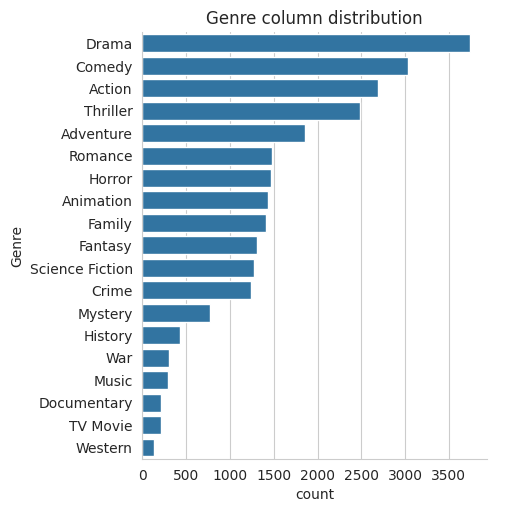

In [24]:
sns.catplot(y='Genre', data = dfg, kind='count', order= dfg['Genre'].value_counts().index )
plt.title('Genre column distribution')
plt.show()

**2. Highest vote movie in the vote avg column**|

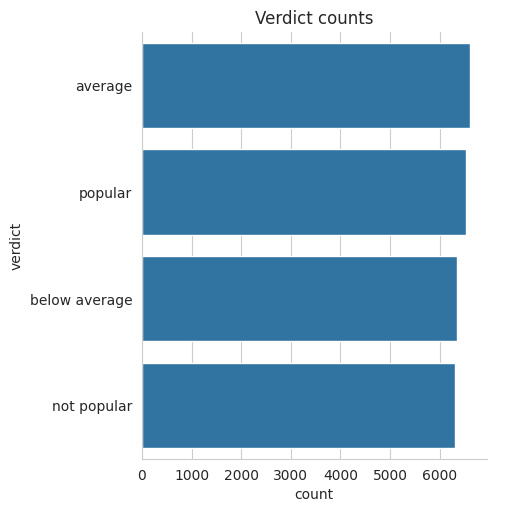

In [25]:
sns.catplot(y='verdict', data = dfg, kind='count' , order = dfg['verdict'].value_counts().index)
plt.title('Verdict counts')
plt.show()

**3. Movie that has the highest popularity and its genre**

In [26]:
# Getting the most popular movie
dfg[dfg['Popularity']==dfg['Popularity'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre,verdict
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,Science Fiction,popular


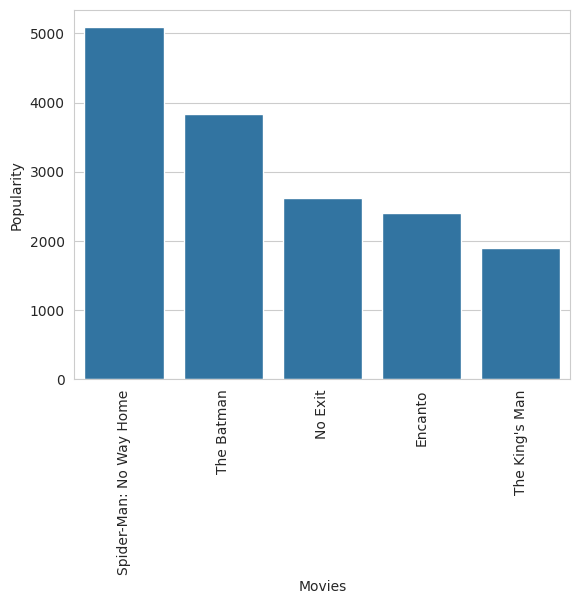

Spider-Man: No Way Home is the most popular movie
['Action' 'Adventure' 'Science Fiction']


In [27]:
# Visualizing to 5 most popular movies
top5 = dfg.drop_duplicates(subset = 'Title').nlargest(5, 'Popularity')
sns.barplot(x='Title', y = 'Popularity', data = top5)
plt.xlabel('Movies')
plt.xticks(rotation=90)
plt.show()

most_popular_movie = top5.iloc[0]['Title']
genres = dfg.loc[dfg['Title']==most_popular_movie, 'Genre'].values
print(most_popular_movie, "is the most popular movie")
print(genres.astype(str))

**4. Movie that has lowest popularity and its genre**

In [28]:
# Lowest popular movie
dfg[dfg['Popularity']==dfg['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre,verdict
25787,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,Music,average
25788,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,Drama,average
25789,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,History,average
25790,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,War,popular
25791,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,Drama,popular
25792,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,Science Fiction,popular


**5. Which year has most movies released**

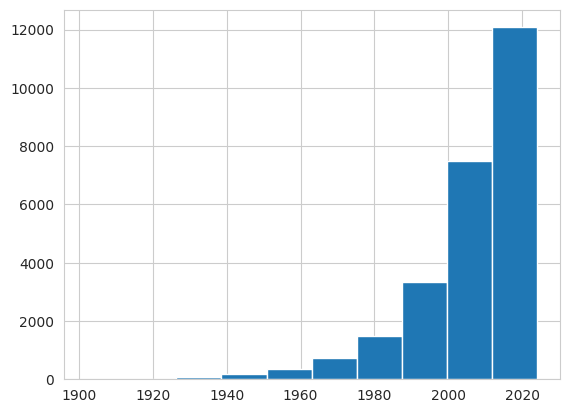

In [38]:
dfg['Release_Date'].hist()
plt.show()